In [1]:
"""
This code is designed to plot the star formation rate vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


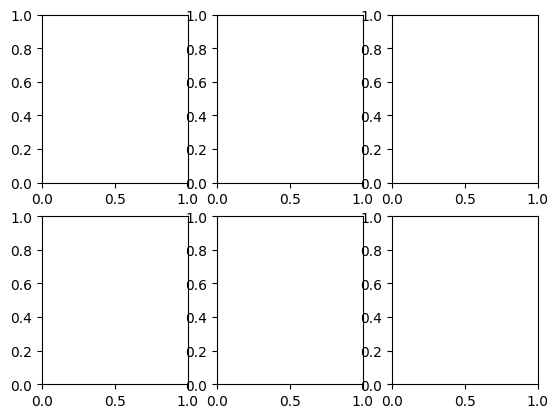

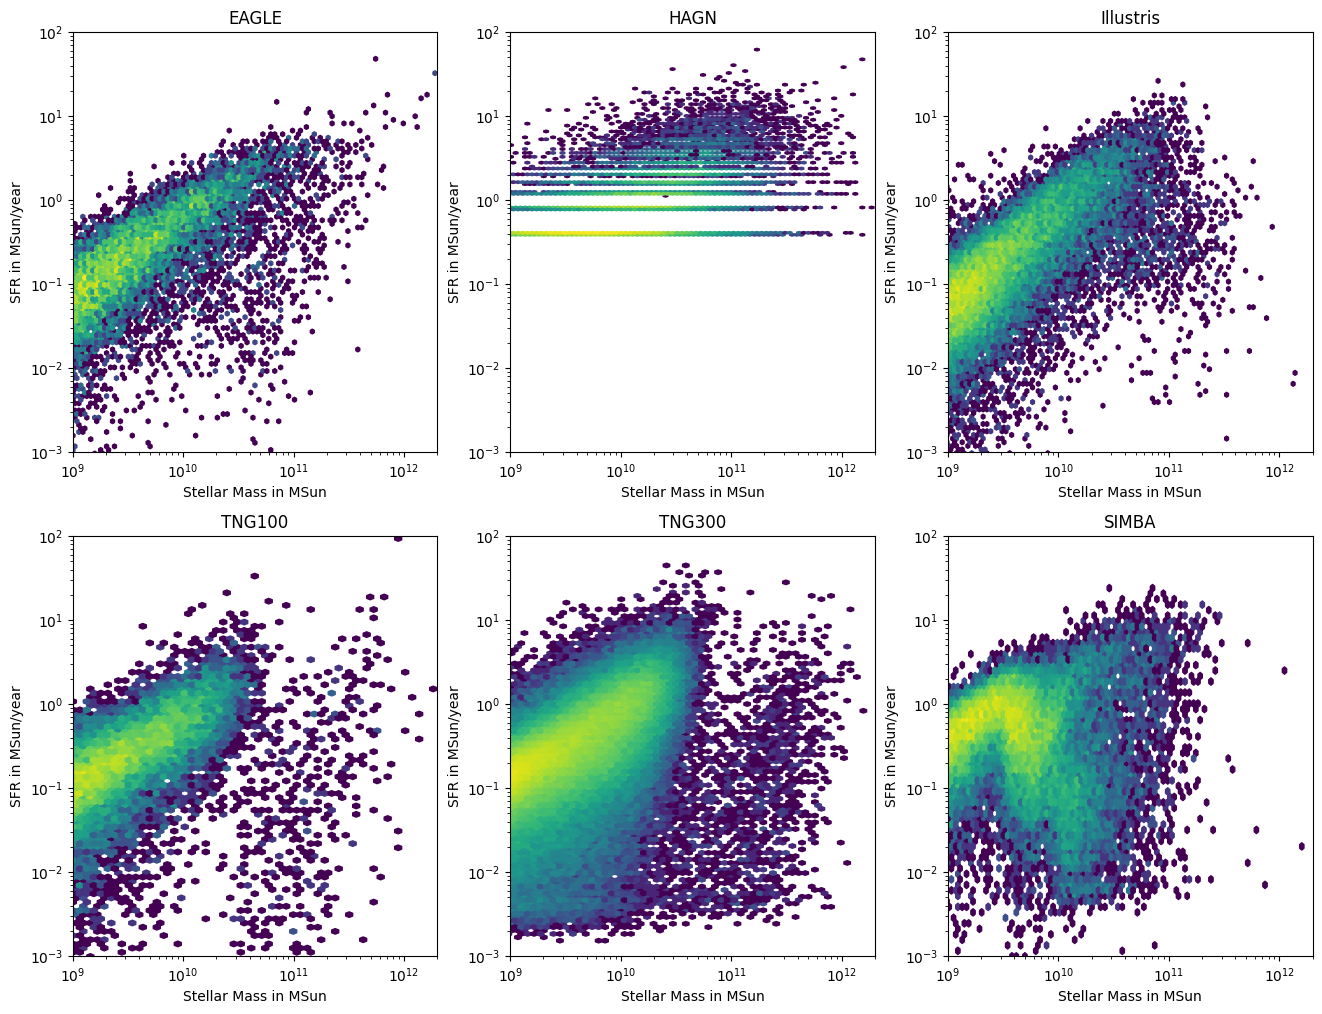

In [2]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr, bins = 'log',xscale='log', yscale='log')
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**2])
    axes[i][j].set_ylabel(r'SFR in MSun/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/stellarMass_vs_sfr')
plt.show()